In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
stats.chisqprob = lambda chisq, df : stats.chi2.sf(chisq , df)
sns.set()


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
a = np.arange(1,101)

In [4]:
b = np.arange(501 , 601)

In [5]:
a_train , a_test = train_test_split(a)

In [6]:
a_train.shape

(75,)

In [7]:
a_test.shape

(25,)

In [8]:
a_train , a_test = train_test_split(a , test_size = 0.30 , shuffle = False , random_state = 1)

In [9]:
a_train.shape

(70,)

In [10]:
a_test.shape

(30,)

In [11]:
a_train

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70])

In [12]:
a_test

array([ 71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100])

In [13]:
b_train , b_test = train_test_split(b , test_size = 0.25 , shuffle = False , random_state = 1)

In [14]:
b_train

array([501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513,
       514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526,
       527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539,
       540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552,
       553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565,
       566, 567, 568, 569, 570, 571, 572, 573, 574, 575])

In [15]:
b_test

array([576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588,
       589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600])

In [16]:
#linear regression real life datasets 
sns.set()

In [17]:
data = pd.read_csv("1.04. Real-life example.csv")

In [18]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [19]:
data.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [20]:
data = data.drop('Model' ,axis = 1)

In [21]:
data.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [22]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [23]:
data_nm_v = data.dropna(axis = 0)

In [24]:
data_nm_v.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


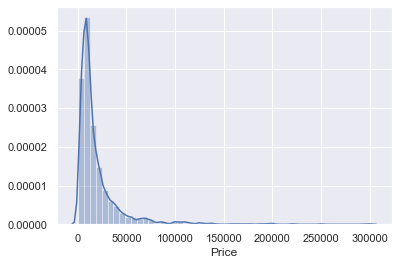

In [25]:
#check for outliers
sns.distplot(data_nm_v['Price']) 

In [26]:
q = data_nm_v['Price'].quantile(0.99)

In [27]:
data_1 = data_nm_v[data_nm_v['Price']< q]

In [28]:
data_1.describe(include  = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


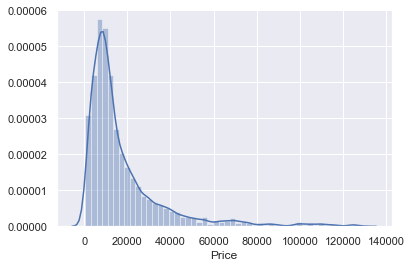

In [29]:
sns.distplot(data_1['Price'])

In [30]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']< q]
data_2.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


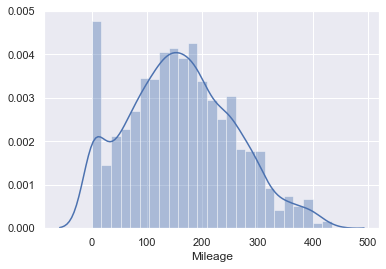

In [31]:
sns.distplot(data_2['Mileage'])

In [32]:
data_3 = data_2[data_2['EngineV'] < 6.5]

In [33]:
data_3.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


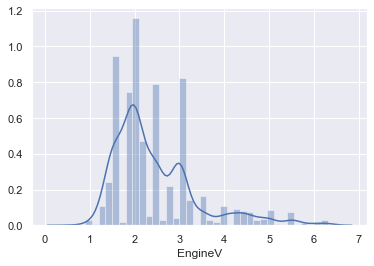

In [34]:
sns.distplot(data_3['EngineV'])

In [35]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q]

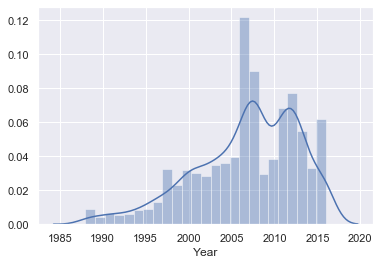

In [36]:
sns.distplot(data_4['Year'])

In [37]:
data_cleaned = data_4.reset_index(drop = True)

In [38]:
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


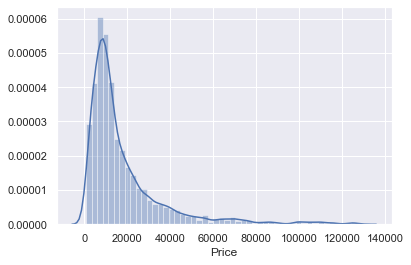

In [39]:
#after checking on the distribution plot for the price
sns.distplot(data_cleaned['Price'])

In [40]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['logprice'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,logprice
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


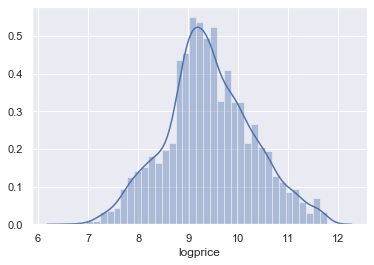

In [41]:
sns.distplot(data_cleaned['logprice'])

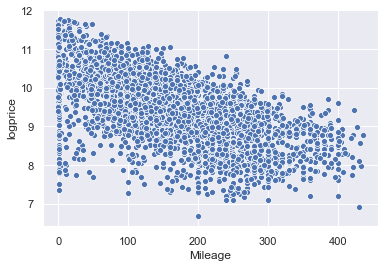

In [42]:
sns.scatterplot(data_cleaned['Mileage'] , data_cleaned['logprice'])

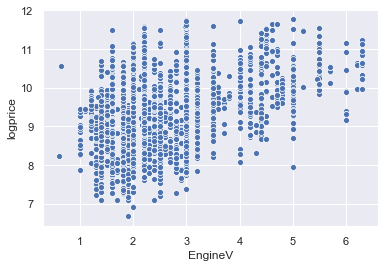

In [43]:
sns.scatterplot(data_cleaned['EngineV'] , data_cleaned['logprice'])

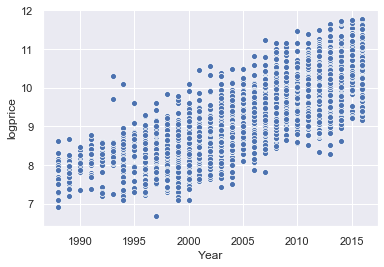

In [44]:
sns.scatterplot(data_cleaned['Year'] , data_cleaned['logprice'])

In [45]:
data_cleaned = data_cleaned.drop("Price",axis = 1)

In [46]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'logprice'], dtype=object)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
variables = data_cleaned[['Mileage','EngineV','Year']]

In [49]:
vif = pd.DataFrame()

In [50]:
vif['vif'] = [variance_inflation_factor(variables.values,i)for i in range(variables.shape[1])]

In [51]:
vif['features'] = variables.columns

In [52]:
vif

,vif,features
0,3.791584,Mileage
1,7.662068,EngineV
2,10.354854,Year


In [53]:
#for violating the rule of the multicollinearity

In [54]:
data_cleaned = data_cleaned.drop('Year' , axis = 1)

In [55]:
data_cleaned 

,Brand,Body,Mileage,EngineV,Engine Type,Registration,logprice
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


In [56]:
data_with_dummies = pd.get_dummies(data_cleaned , drop_first = True)

In [57]:
data_with_dummies

,Mileage,EngineV,logprice,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [58]:
#rearrangement of the data

In [59]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'logprice', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [60]:
cols = ['logprice','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [61]:
data_preprocessed = data_with_dummies[cols]

In [62]:
data_preprocessed

,logprice,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [63]:
#linear Regression method

In [64]:
#declaring the variables
x = data_preprocessed.drop('logprice' , axis = 1)
y = data_preprocessed['logprice']

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [66]:
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [67]:
x_scaled = scaler.transform(x)

In [68]:
x_scaled

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

In [69]:
#train-test-split
x_train , x_test ,y_train , y_test = train_test_split(x_scaled , y , test_size = 0.20 , random_state =365)

In [70]:
#create regression
lm = LinearRegression()
lm.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
#predict the data
y_hat = lm.predict(x_train)

In [72]:
y_hat

array([8.85904429, 9.3574518 , 9.65596774, ..., 9.8871806 , 7.88940919,
       9.93899564])

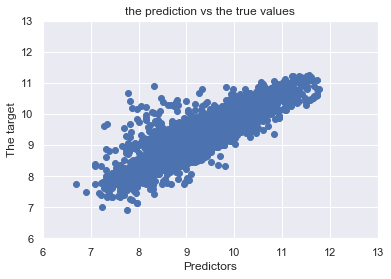

In [73]:
plt.scatter(y_train,y_hat)
plt.title("the prediction vs the true values")
plt.xlabel("Predictors")
plt.ylabel("The target")
plt.ylim(6,13)
plt.xlim(6,13)
plt.show()

Text(0.5, 1.0, 'The Residual')

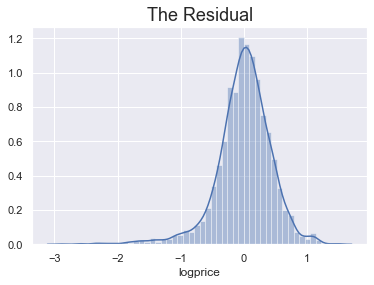

In [74]:
sns.distplot(y_train - y_hat )
plt.title("The Residual" , fontsize = 18)

In [75]:
lm.score(x_train , y_train)

0.744996578792662

In [76]:
#getting the coefficient and intercept

In [77]:
lm.intercept_

9.415239458021299

In [78]:
lm.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [79]:
#summary
results_summary = pd.DataFrame(x.columns.values , columns = ['Features'])
results_summary["weight"] = lm.coef_

In [80]:
results_summary

,Features,weight
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [81]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [82]:
#testing part

In [83]:
y_hat_test = lm.predict(x_test)

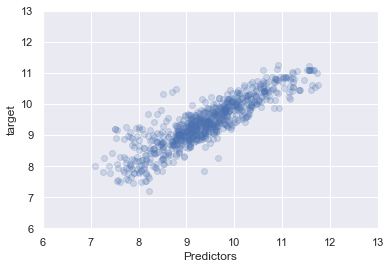

In [84]:
plt.scatter(y_test , y_hat_test , alpha = 0.20)
plt.xlabel("Predictors")
plt.ylabel("target")
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [85]:
df_pf = pd.DataFrame(np.exp(y_hat_test) , columns = ['Predictions'])

In [86]:
df_pf

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075
...,...
769,29651.726363
770,10732.071179
771,13922.446953
772,27487.751303


In [87]:
df_pf['Target'] = np.exp(y_test)

In [88]:
y_test = y_test.reset_index(drop = True)

In [89]:
df_pf['Target'] = np.exp(y_test)

In [90]:
df_pf

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [91]:
df_pf['Residual'] = df_pf['Predictions'] - df_pf['Target']

In [92]:
df_pf

,Predictions,Target,Residual
0,10685.501696,2300.0,8385.501696
1,3499.255242,2800.0,699.255242
2,7553.285218,2500.0,5053.285218
3,7463.963017,6400.0,1063.963017
4,11353.490075,9150.0,2203.490075
...,...,...,...
769,29651.726363,29500.0,151.726363
770,10732.071179,9600.0,1132.071179
771,13922.446953,18300.0,-4377.553047
772,27487.751303,68500.0,-41012.248697


In [93]:
df_pf['Difference%'] = np.absolute(df_pf['Residual'] / df_pf['Target']*100)

In [94]:
df_pf

,Predictions,Target,Residual,Difference%
0,10685.501696,2300.0,8385.501696,364.587030
1,3499.255242,2800.0,699.255242,24.973402
2,7553.285218,2500.0,5053.285218,202.131409
3,7463.963017,6400.0,1063.963017,16.624422
4,11353.490075,9150.0,2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,151.726363,0.514327
770,10732.071179,9600.0,1132.071179,11.792408
771,13922.446953,18300.0,-4377.553047,23.921055
772,27487.751303,68500.0,-41012.248697,59.871896


In [95]:
#Logistics Regression 

In [105]:
data = pd.read_csv("2.02. Binary predictors.csv")

In [106]:
data

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [107]:
data['Gender'] = data['Gender'].map({'Female' : 1 , 'Male' : 0})

In [108]:
data['Gender']

0      0
1      1
2      1
3      0
4      0
      ..
163    1
164    0
165    0
166    0
167    0
Name: Gender, Length: 168, dtype: int64

In [109]:
data['Admitted']  = data['Admitted'].map({'Yes' : 0 , 'No': 1})

In [110]:
data['Admitted']

0      1
1      0
2      0
3      1
4      1
      ..
163    0
164    0
165    1
166    1
167    1
Name: Admitted, Length: 168, dtype: int64

In [111]:
data

,SAT,Admitted,Gender
0,1363,1,0
1,1792,0,1
2,1954,0,1
3,1653,1,0
4,1593,1,0
...,...,...,...
163,1722,0,1
164,1750,0,0
165,1555,1,0
166,1524,1,0


In [112]:
#declaring my variables

In [113]:
y = data['Admitted']
x1 = data['Gender']

In [114]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x).fit()
result_summary = reg_log.summary()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


In [115]:
result_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:                  0.1659
Time:                        06:09:03   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6436      0.222      2.901      0.004       0.209       1.078
Gender        -2.0786      0.363     -5.727      0.000      -2.790      -1.367
==============================================================================
"""

In [116]:
np.exp(2.0786)

7.993270498536442

In [117]:
result_log.predict()[0:5]

array([3.17509804e-06, 9.95320711e-01, 9.99994789e-01, 3.82545559e-01,
       4.74688306e-02])

In [118]:
np.array(data['Admitted'])

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [119]:
result_log.pred_table()

array([[67.,  7.],
       [ 7., 87.]])

In [120]:
#reformatting the table

In [121]:
cd_df = pd.DataFrame(result_log.pred_table())
cd_df.columns = ["Predicted 0" , "Predicted 1"]
cd_df = cd_df.rename(index = {0 :'Actual 0' , 1 : 'Actual 1'})


In [122]:
cd_df

,Predicted 0,Predicted 1
Actual 0,67.0,7.0
Actual 1,7.0,87.0


In [123]:
cm = np.array(cd_df)
accuracy_train = (cm[0,0] + cm[1,1]/cm.sum())
accuracy_train


67.51785714285714